In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as mp

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score





* import pandas as pd //  Veri okumak için kullanılır.
* import seaborn as sns //  İstatistiksel grafikler oluşturmak için kullanılır.
* import matplotlib.pyplot as mp // Grafik çizimi için kullanılır.
* from sklearn.neighbors import KNeighborsClassifier // Sınıflandırma modeli oluşturmak için kullanılır.
* from sklearn.model_selection import train_test_split //Veriyi eğitim ve test setlerine ayırmak için kullanılır.
* from sklearn.metrics import accuracy_score // Modelin doğruluğunu hesaplamak için kullanılır.








In [2]:
dataset = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

In [3]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


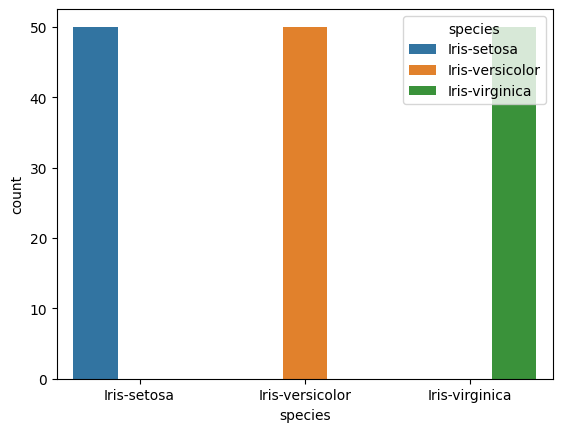

In [4]:
sns.countplot(x='species', hue='species', data=dataset)
mp.show()

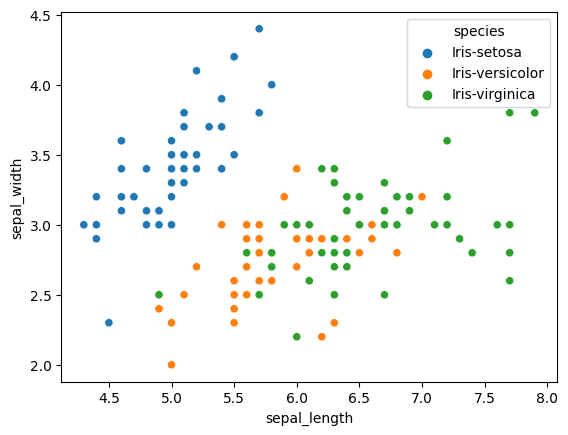

In [5]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=dataset)
mp.show()

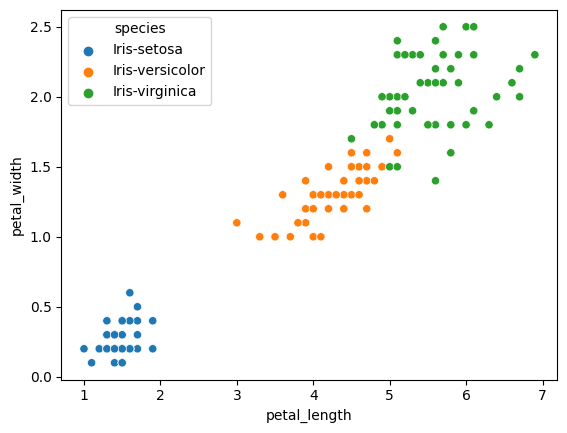

In [6]:
sns.scatterplot(x='petal_length',y='petal_width',hue='species',data=dataset)
mp.show()

In [7]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
X = dataset.drop('species',axis=1)
Y = dataset['species']

In [9]:
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [10]:
print(Y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

* X: Özellikler (bağımsız değişkenler) - modelin öğrenmesi gereken veriler.
* Y: Hedef (bağımlı değişken) - modelin tahmin etmesi gereken değerler.
* test_size=0.3: Verinin %30'unu test seti olarak ayırır. %70'i eğitim seti olarak kalır.
* random_state=2: Rastgelelik için başlangıç değeri veri setleri oluşturur.
* Eğitim seti (X_train ve y_train): Modelin öğrenmesi için kullanılır.
* Test seti (X_test ve y_test): Modelin performansını değerlendirmek için kullanılır.

* Öklidyen Mesafesi (Euclidean Distance):
* 
İki nokta arasındaki düz çizgi mesafesini ifade eder.

Matematiksel olarak, n boyutlu uzayda iki nokta arasındaki mesafe şu şekilde hesaplanır:

𝑑
(
𝑥
,
𝑦
)
=
∑
𝑖
=
1
𝑛
(
𝑥
𝑖
−
𝑦
𝑖
)
2
d(x,y)= 
i=1
∑
n
​
 (x 
i
​
 −y 
i
​
 ) 
2
 
​
 
Öklidyen mesafesi, fiziksel anlamda gerçek dünyada kullanılır ve genellikle en yaygın kullanılan mesafe ölçümüdür.

* Manhattan Mesafesi (Manhattan Distance):
* 
Aynı zamanda "City Block Distance" veya "L1 Norm" olarak da bilinir.

İki nokta arasındaki mesafeyi, sadece yatay ve dikey doğrular boyunca hareket ederek ölçer (şehir bloklarında yürüyormuş gibi).

Matematiksel olarak, n boyutlu uzayda iki nokta arasındaki mesafe şu şekilde hesaplanır:

𝑑
(
𝑥
,
𝑦
)
=
∑
𝑖
=
1
𝑛
∣
𝑥
𝑖
−
𝑦
𝑖
∣
d(x,y)= 
i=1
∑
n
​
 ∣x 
i
​
 −y 
i
​
 ∣
Bu mesafe ölçüsü, özellikle verilerin yoğunluklu olduğu veya farklı özelliklerin farklı ölçeklerde olduğu durumlarda kullanışlıdır.

* Çebişev Mesafesi (Chebyshev Distance):
* 
Aynı zamanda "L∞ Norm" olarak da bilinir.

İki nokta arasındaki mesafeyi, her bir boyuttaki maksimum mutlak fark olarak tanımlar.

Matematiksel olarak, n boyutlu uzayda iki nokta arasındaki mesafe şu şekilde hesaplanır:

𝑑
(
𝑥
,
𝑦
)
=
max
⁡
𝑖
(
∣
𝑥
𝑖
−
𝑦
𝑖
∣
)
d(x,y)= 
i
max
​
 (∣x 
i
​
 −y 
i
​
 ∣)
Bu mesafe ölçüsü, verilerin kare grid şeklinde düzenlendiği ve sadece maksimum farkın önemli olduğu durumlarda kullanışlıdır.

In [12]:
knn_model = KNeighborsClassifier(n_neighbors=3,metric = "euclidean")
knn_model.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [13]:
knn_model.score(X_train,y_train)*100


94.28571428571428

In [14]:
knn_model.score(X_test,y_test)*100


100.0

# Tablo

In [15]:
prediction = knn_model.predict(X_test)


In [16]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': prediction})
cross_check

,Actual,Predicted
6,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
113,Iris-virginica,Iris-virginica
12,Iris-setosa,Iris-setosa
24,Iris-setosa,Iris-setosa
129,Iris-virginica,Iris-virginica
25,Iris-setosa,Iris-setosa
108,Iris-virginica,Iris-virginica
128,Iris-virginica,Iris-virginica
45,Iris-setosa,Iris-setosa


Text(158.22222222222223, 0.5, 'Actual')

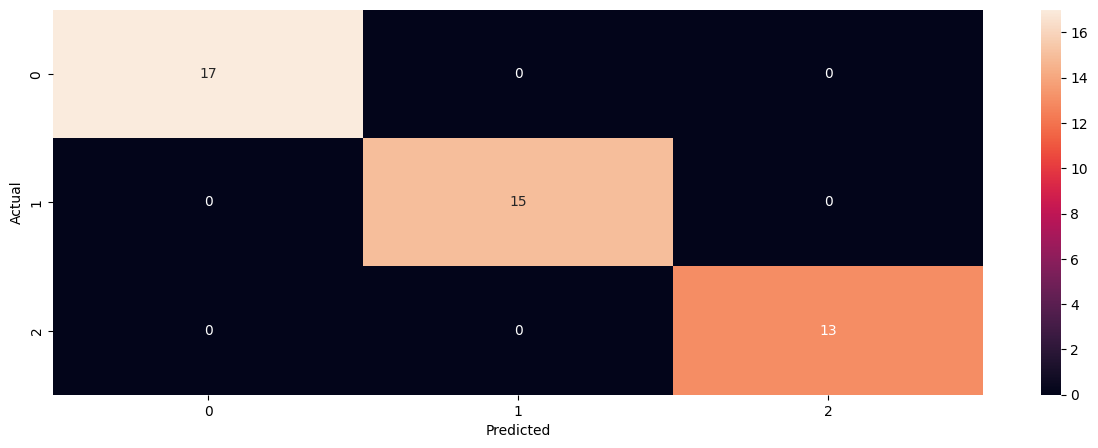

In [17]:
from sklearn.metrics import confusion_matrix
predict = knn_model.predict(X_test)
cm = confusion_matrix(y_test,prediction)
mp.figure(figsize=(15,5))
sns.heatmap(cm,annot=True)
mp.xlabel('Predicted')
mp.ylabel('Actual')

# Toplu

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

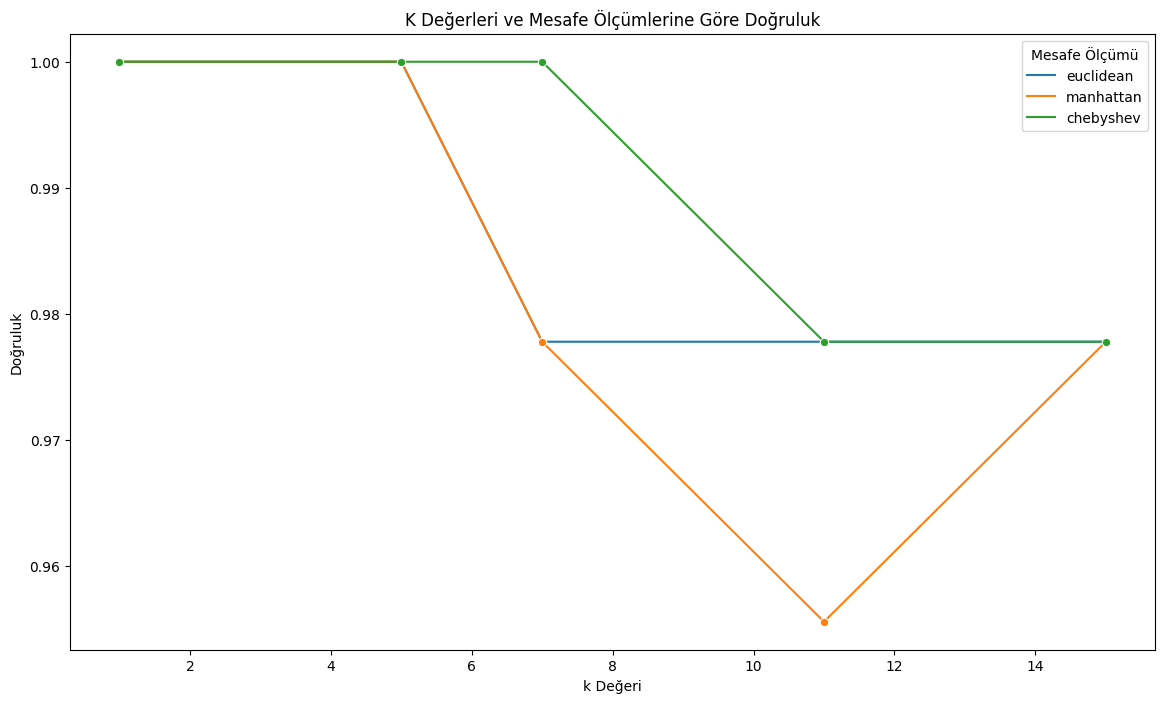

In [18]:
k_values = [1,5 ,7,11,15]
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

results = []

for metric in distance_metrics:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append((k, metric, accuracy))

results_df = pd.DataFrame(results, columns=['k', 'distance_metric', 'accuracy'])

mp.figure(figsize=(14, 8))
sns.lineplot(data=results_df, x='k', y='accuracy', hue='distance_metric', marker='o')
mp.title('K Değerleri ve Mesafe Ölçümlerine Göre Doğruluk')
mp.xlabel('k Değeri')
mp.ylabel('Doğruluk')
mp.legend(title='Mesafe Ölçümü')
mp.show()